<a href="https://colab.research.google.com/github/Rajasri2345/kmeans-clustering/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering Implementation and Analysis

# K-Means Clustering: Complete Implementation and Analysis

This notebook contains a complete implementation of K-Means clustering from scratch using NumPy, along with analysis and comparison with scikit-learn.

## Table of Contents
1. Custom K-Means Implementation
2. Synthetic Dataset Generation
3. Elbow Method Analysis
4. Final Clustering Visualization
5. Performance Comparison



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time

---

## Task 1: Custom K-Means Implementation

Implementing K-Means clustering algorithm from scratch using only NumPy.

In [ ]:
class CustomKMeans:




    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=None):
        """
        Initialize K-Means clustering.

        Parameters:
        -----------
        n_clusters : int
            Number of clusters to form
        max_iter : int
            Maximum number of iterations
        tol : float
            Tolerance for convergence
        random_state : int
            Random seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None
        self.inertia_ = None
        self.n_iter_ = 0

    def _initialize_centroids(self, X):
        """
        Randomly initializes centroids from the data points.
        """
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """
        Assigns each data point to the closest centroid.
        Returns cluster labels and calculates inertia.
        """
        # Calculate Euclidean distance from each point to each centroid
        # Reshape X to (n_samples, 1, n_features) and centroids to (1, n_clusters, n_features)
        # Then broadcast to calculate squared differences.
        # Sum along the last axis (features) to get squared distances.
        # Take sqrt to get actual distances.
        distances = np.sqrt(np.sum((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :])**2, axis=2))
        labels = np.argmin(distances, axis=1) # Assign each point to the closest centroid
        inertia = np.sum(np.min(distances, axis=1)**2) # Sum of squared distances of samples to their closest cluster center
        return labels, inertia

    def _update_centroids(self, X, labels):
        """
        Updates centroids based on the mean of the assigned data points.
        """
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.sum(labels == i) > 0 else self.centroids[i]
                                  for i in range(self.n_clusters)])
        return new_centroids

    def fit(self, X):
        """
        Fit K-Means to the dataset.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # 1. Initialize centroids
        self.centroids = self._initialize_centroids(X)
        self.n_iter_ = 0

        for i in range(self.max_iter):
            self.n_iter_ += 1
            # 2. Assign clusters
            self.labels_, current_inertia = self._assign_clusters(X)

            # Store current centroids for convergence check
            old_centroids = np.copy(self.centroids)

            # 3. Update centroids
            self.centroids = self._update_centroids(X, self.labels_)

            # Check for convergence: if centroids haven't moved significantly
            if np.sum(np.abs(self.centroids - old_centroids)) < self.tol:
                break

        self.inertia_ = current_inertia
        return self

    def predict(self, X):
        """
        Predict the closest cluster label for each sample.
        """
        if self.centroids is None:
            raise RuntimeError("Model has not been fitted yet. Call fit() first.")
        distances = np.sqrt(np.sum((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :])**2, axis=2))
        return np.argmin(distances, axis=1)

# Task 2 Generate_synthetic_dataset
Create a synthetic 2D dataset with 300 samples, 4 centers, and a cluster standard deviation of 0.6 using `sklearn.datasets.make_blobs`, and then visualize this dataset using Matplotlib to inspect the distribution of data points.

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.6, random_state=42)
print("Shape of X:", X.shape)
print("Shape of y_true:", y_true.shape)
print("First 5 rows of X:\n", X[:5])
print("First 5 elements of y_true:", y_true[:5])

Shape of X: (300, 2)
Shape of y_true: (300,)
First 5 rows of X:
 [[ -9.1139443    6.81361629]
 [ -9.35457578   7.09278959]
 [ -2.01567068   8.28177994]
 [ -7.01023591  -6.22084348]
 [-10.06120248   6.71867113]]
First 5 elements of y_true: [3 3 0 2 3]


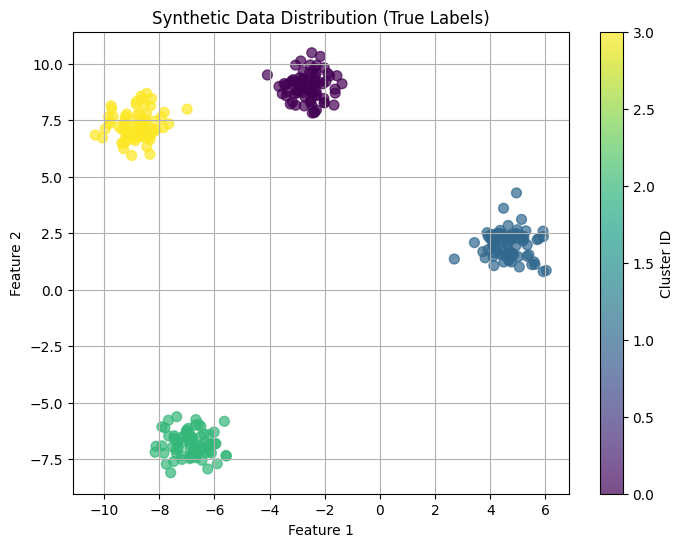

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
plt.title('Synthetic Data Distribution (True Labels)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()

##Task3 elbow_method_analysis


Perform Elbow Method analysis to determine the optimal number of clusters (K) for the synthetic dataset using the custom K-Means implementation.


In [ ]:
inertia_values = []
k_values = range(1, 11) # Test K from 1 to 10

for k in k_values:
    kmeans = CustomKMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

print("Inertia values for K from 1 to 10:", inertia_values)

Inertia values for K from 1 to 10: [np.float64(19652.395371623046), np.float64(9051.816244812302), np.float64(1773.7368661265255), np.float64(1755.0618453393215), np.float64(1755.0618453393215), np.float64(1723.6627879543535), np.float64(1713.9499717446402), np.float64(144.10385245869804), np.float64(139.29219080881458), np.float64(136.06001480477514)]


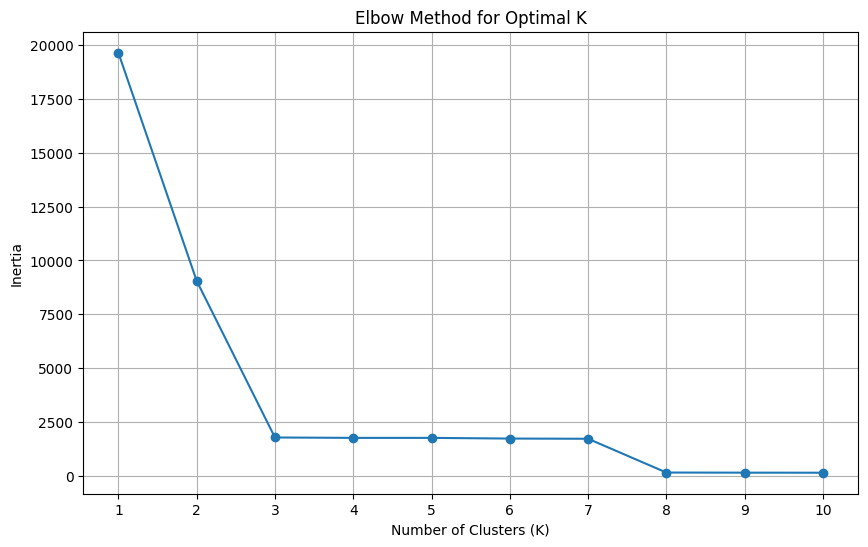

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
kmeans_optimal = CustomKMeans(n_clusters=4, random_state=42)
kmeans_optimal.fit(X)
custom_kmeans_labels = kmeans_optimal.labels_

print("Number of iterations to converge:", kmeans_optimal.n_iter_)
print("Final inertia for K=4:", kmeans_optimal.inertia_)

Number of iterations to converge: 7
Final inertia for K=4: 1755.0618453393215


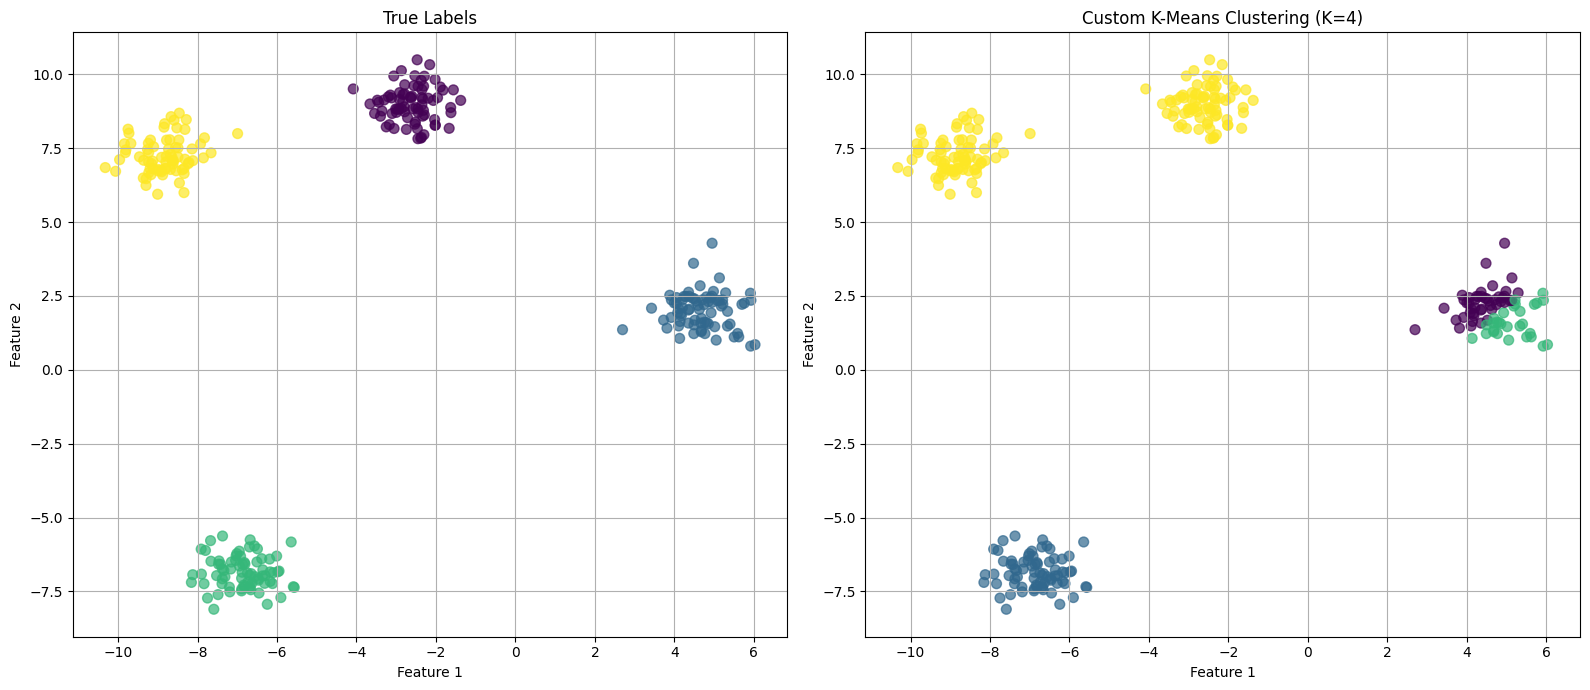

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot for True Labels
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
axes[0].set_title('True Labels')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True)

# Plot for Custom K-Means Clustering
axes[1].scatter(X[:, 0], X[:, 1], c=custom_kmeans_labels, cmap='viridis', s=50, alpha=0.7)
axes[1].set_title('Custom K-Means Clustering (K=4)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Task4 Final Clustering Visualization


Visualize the synthetic dataset 'X' with data points colored according to the 'custom_kmeans_labels' obtained from the custom K-Means algorithm, and also display the final centroids.


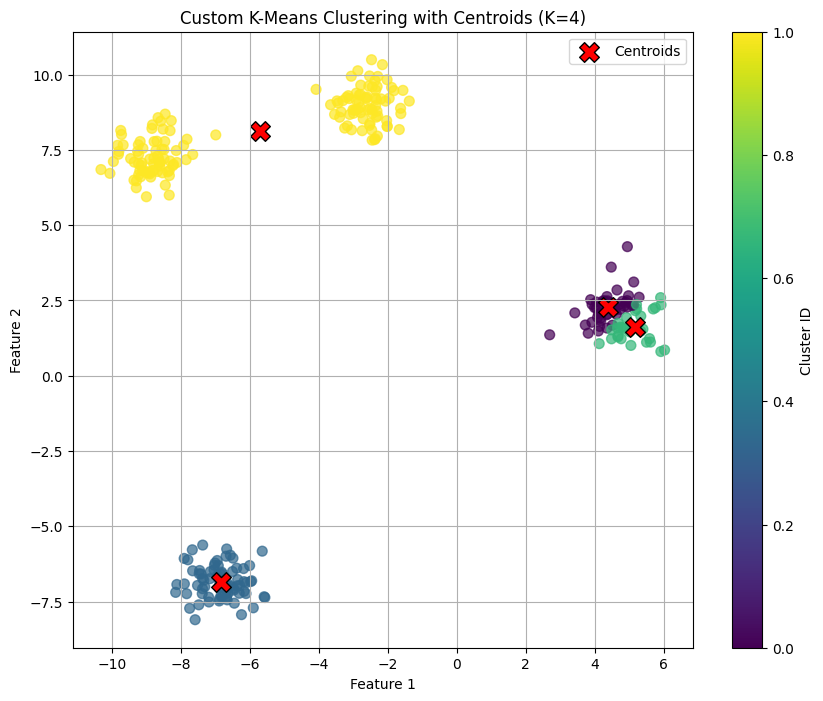

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=custom_kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.centroids[:, 0], kmeans_optimal.centroids[:, 1],
            marker='X', s=200, color='red', edgecolor='black', label='Centroids')
plt.title('Custom K-Means Clustering with Centroids (K=4)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')
plt.legend()
plt.grid(True)
plt.show()

## Scikit-learn K-Means Clustering

Apply scikit-learn's KMeans to the synthetic dataset (X) with K=4 and `random_state=42`. Measure its execution time and inertia.


In [ ]:
start_time = time.time()
sklearn_kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
sklearn_kmeans.fit(X)
end_time = time.time()

sklearn_execution_time = end_time - start_time
sklearn_kmeans_labels = sklearn_kmeans.labels_
sklearn_kmeans_inertia = sklearn_kmeans.inertia_

print(f"Scikit-learn KMeans Execution Time: {sklearn_execution_time:.4f} seconds")
print(f"Scikit-learn KMeans Final Inertia: {sklearn_kmeans_inertia:.4f}")

Scikit-learn KMeans Execution Time: 0.1369 seconds
Scikit-learn KMeans Final Inertia: 203.8907


##Task5 Performance Comparison (Time and Inertia)




In [ ]:
start_time_custom = time.time()
kmeans_optimal.fit(X)
end_time_custom = time.time()
custom_kmeans_execution_time = end_time_custom - start_time_custom

print(f"\n--- Performance Comparison ---")
print(f"Custom K-Means Execution Time: {custom_kmeans_execution_time:.4f} seconds")
print(f"Scikit-learn KMeans Execution Time: {sklearn_execution_time:.4f} seconds")
print(f"\nCustom K-Means Final Inertia: {kmeans_optimal.inertia_:.4f}")
print(f"Scikit-learn KMeans Final Inertia: {sklearn_kmeans_inertia:.4f}")


--- Performance Comparison ---
Custom K-Means Execution Time: 0.0058 seconds
Scikit-learn KMeans Execution Time: 0.1369 seconds

Custom K-Means Final Inertia: 1755.0618
Scikit-learn KMeans Final Inertia: 203.8907


## Visualization of Scikit-learn Results





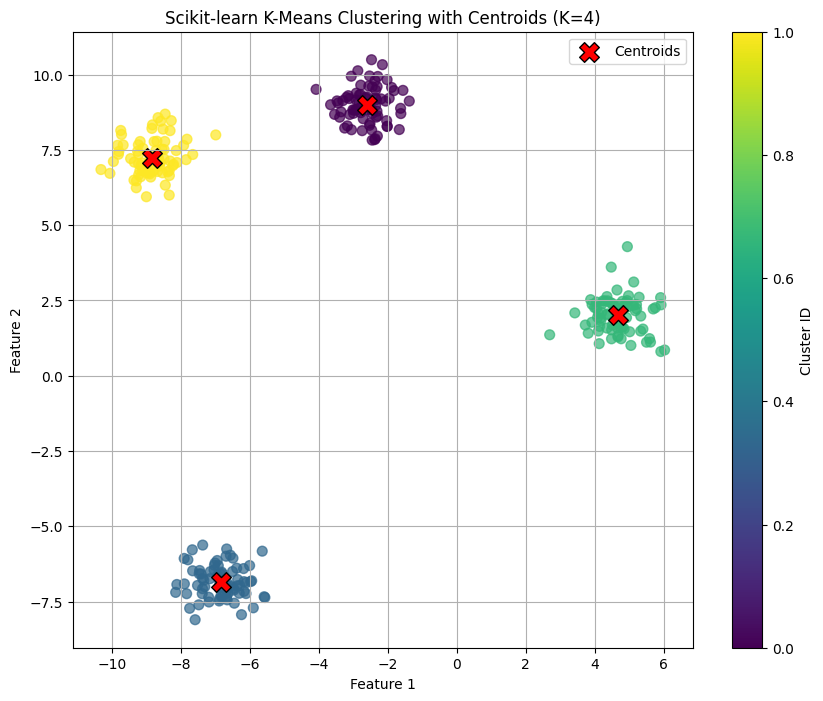

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=sklearn_kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(sklearn_kmeans.cluster_centers_[:, 0], sklearn_kmeans.cluster_centers_[:, 1],
            marker='X', s=200, color='red', edgecolor='black', label='Centroids')
plt.title('Scikit-learn K-Means Clustering with Centroids (K=4)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')
plt.legend()
plt.grid(True)
plt.show()